# Projet 10 Détectez des faux billets avec Python  Partie 1 : Nettoyage


## Import Librairie

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


import seaborn as sns


import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from statsmodels.compat import lzip
from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



from scipy.stats import shapiro
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import t, shapiro

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition, preprocessing,cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import decomposition, preprocessing
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler

import P_10_tools as lt


## Import fichiers

In [2]:
#Import du fichier en précisant l'argument définissant le delimiteur
billets=pd.read_csv(r"C:\Users\ludov\Desktop\OC\FORMATION\Projet10\billets.csv",delimiter=";")

## Analyses et traitements dataframe

### Billets

In [3]:
lt.analyse_basic(billets)

Afficher les premières lignes du dataframe:
 


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09



Afficher les informations générales sur le dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


None


Afficher la moyenne, l'écart-type, le minimum et le maximum de chaque colonne numérique:



,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000



Afficher le nombre de valeurs uniques dans chaque colonne:



is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64


Afficher la fréquence des valeurs dans chaque colonne:



is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length
False       171.04    104.23       104.22        4.87        3.56       111.54    1
True        171.99    103.97       103.89        4.22        3.17       113.12    1
                      103.90       104.21        4.18        3.07       113.01    1
                      103.79       103.90        4.62        2.90       112.92    1
                      103.75       104.14        4.19        2.82       112.83    1
                                                                                 ..
False       172.55    104.25       104.23        5.60        3.13       111.72    1
            172.52    104.48       104.17        5.16        3.39       110.71    1
                      104.11       104.35        5.30        3.31       111.55    1
            172.51    104.43       104.17        5.11        3.08       111.70    1
True        172.92    103.55       103.94        4.78        3.27       113.55   


Afficher le nombre de valeurs manquantes par colonne:



is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

le dataframe contient 37 lignes contenant des NaN
Cela represente 2.5 % du dataframe.

Les lignes concernées sont [72, 99, 151, 197, 241, 251, 284, 334, 410, 413, 445, 481, 505, 611, 654, 675, 710, 739, 742, 780, 798, 844, 845, 871, 895, 919, 945, 946, 981, 1076, 1121, 1176, 1303, 1315, 1347, 1435, 1438]

Affichage des lignes concernées: 

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True  

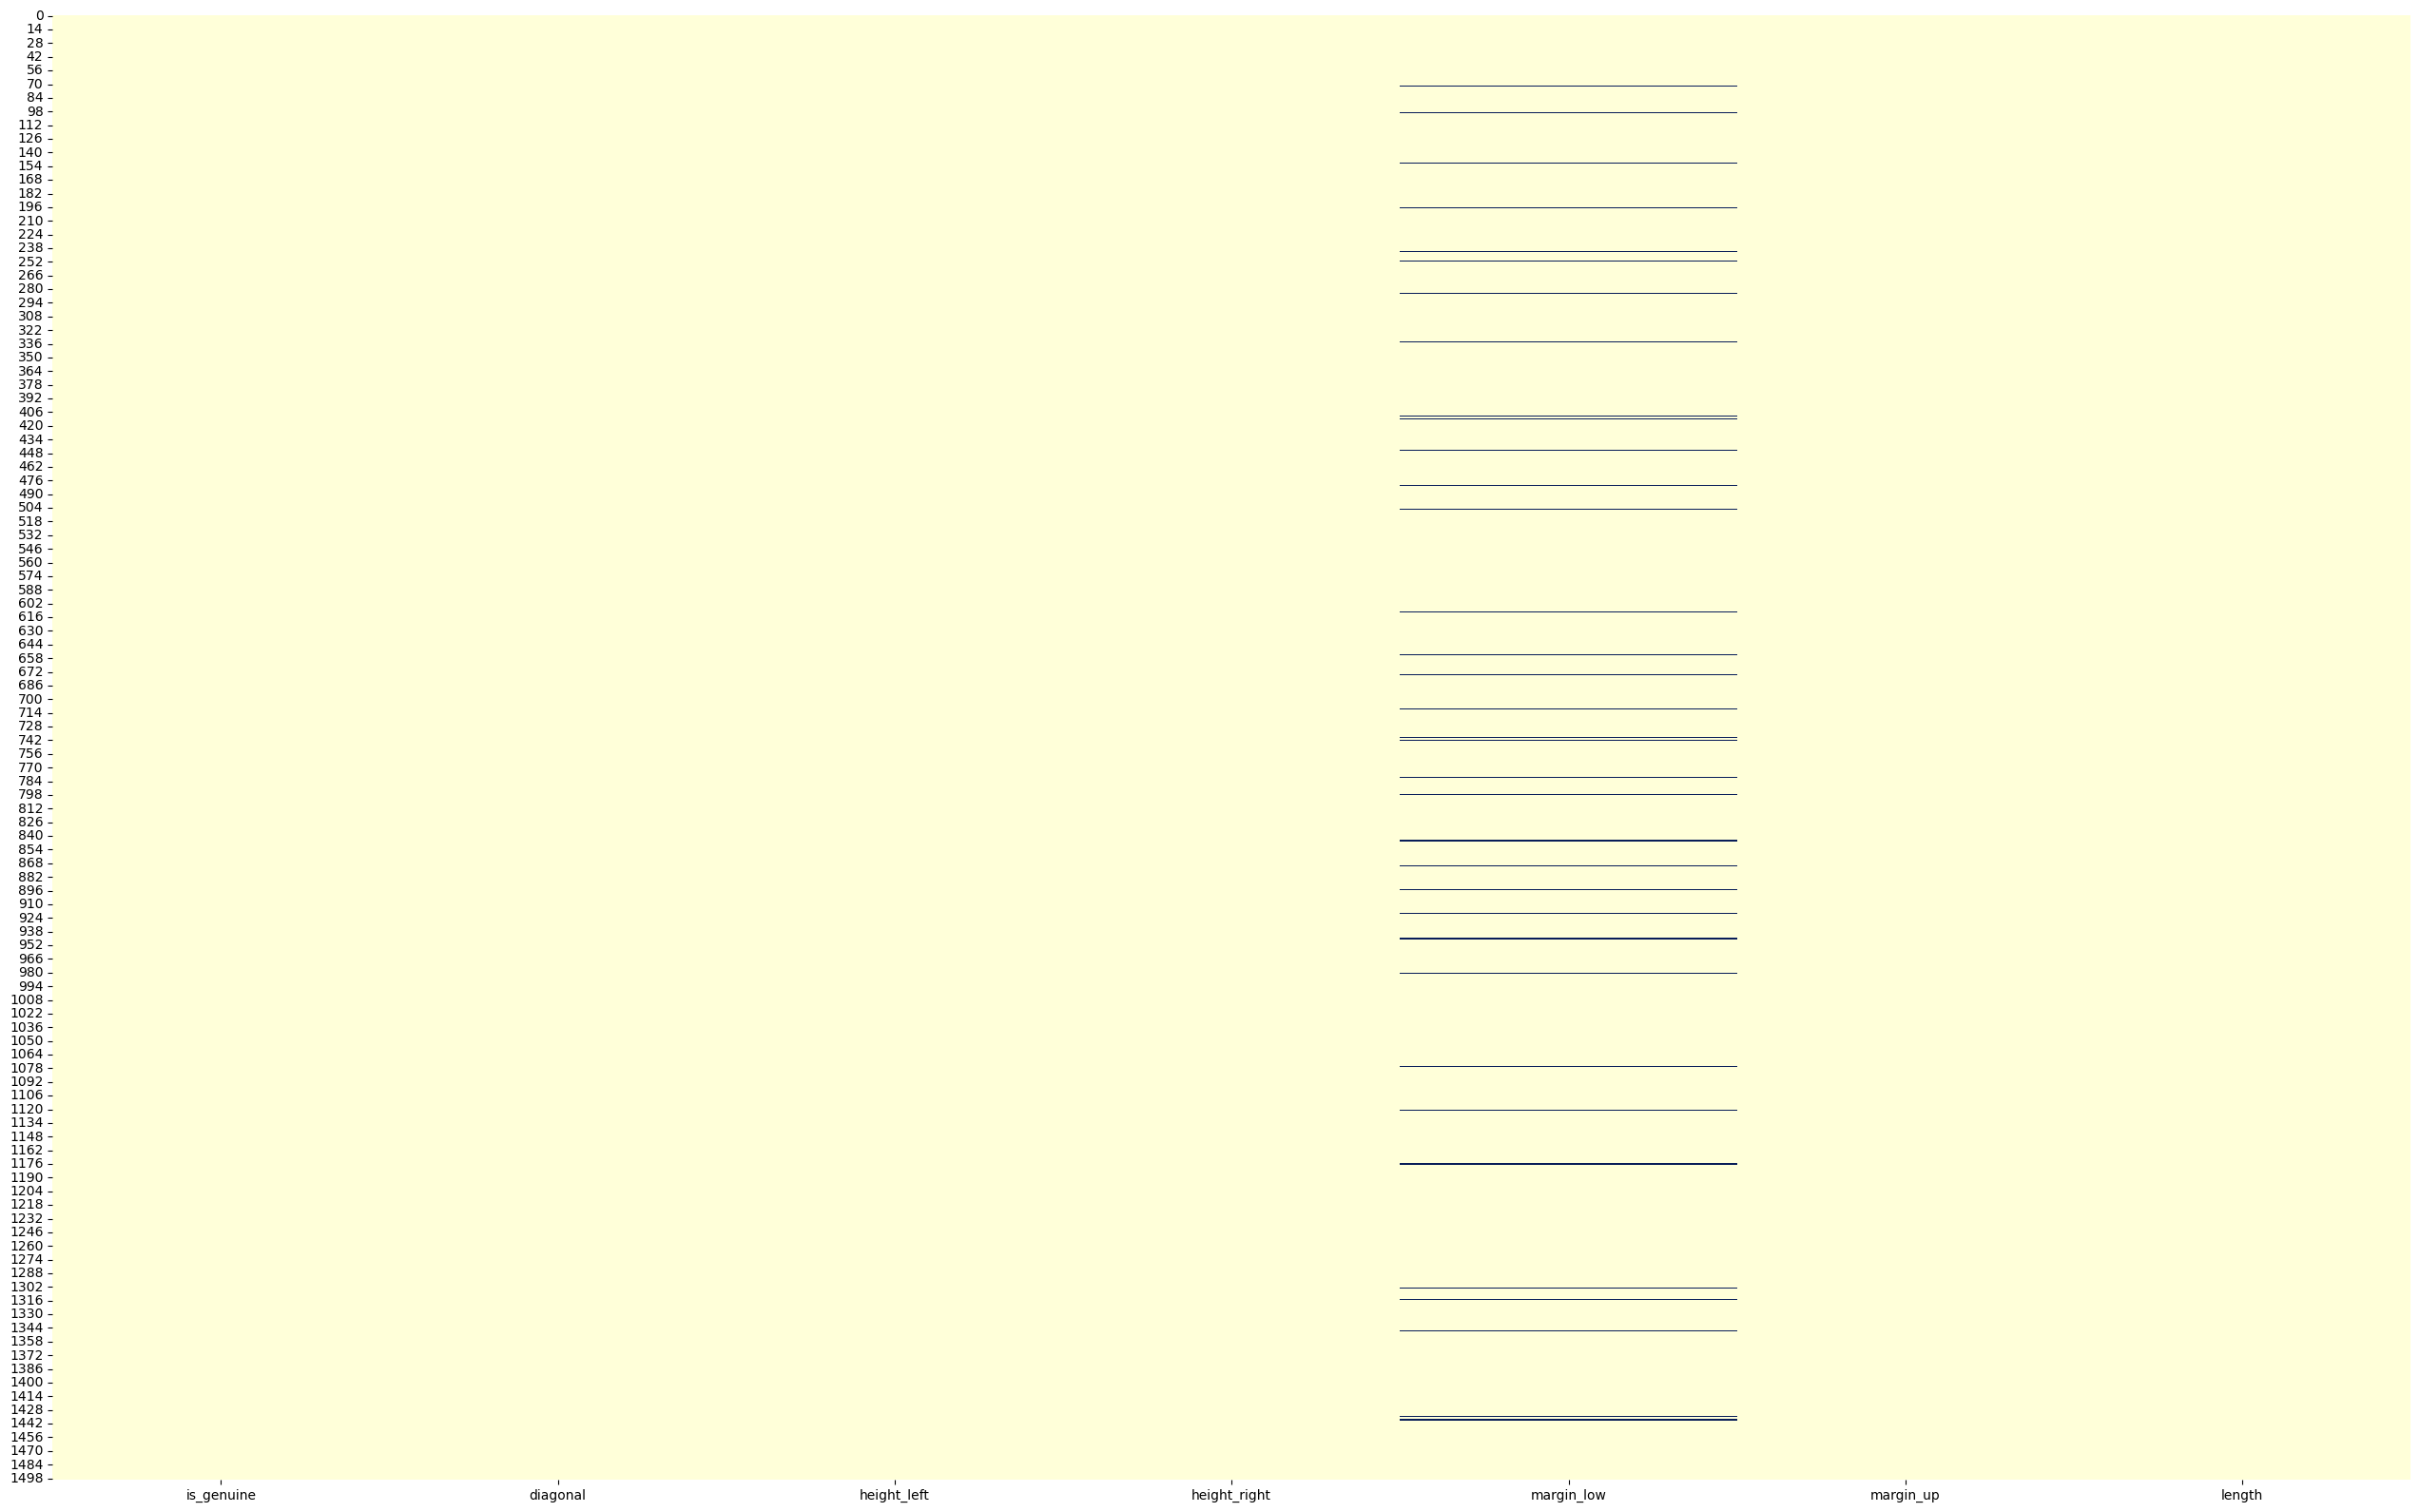

In [4]:
lt.nan_control(billets)

#### Separation du df

In [5]:
billets_no_nan,billets_nan=lt.separation_nan(billets)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08


In [6]:
lt.nan_control(billets_no_nan)

le dataframe ne contient pas de NaN 


#### Correlations entre les variables

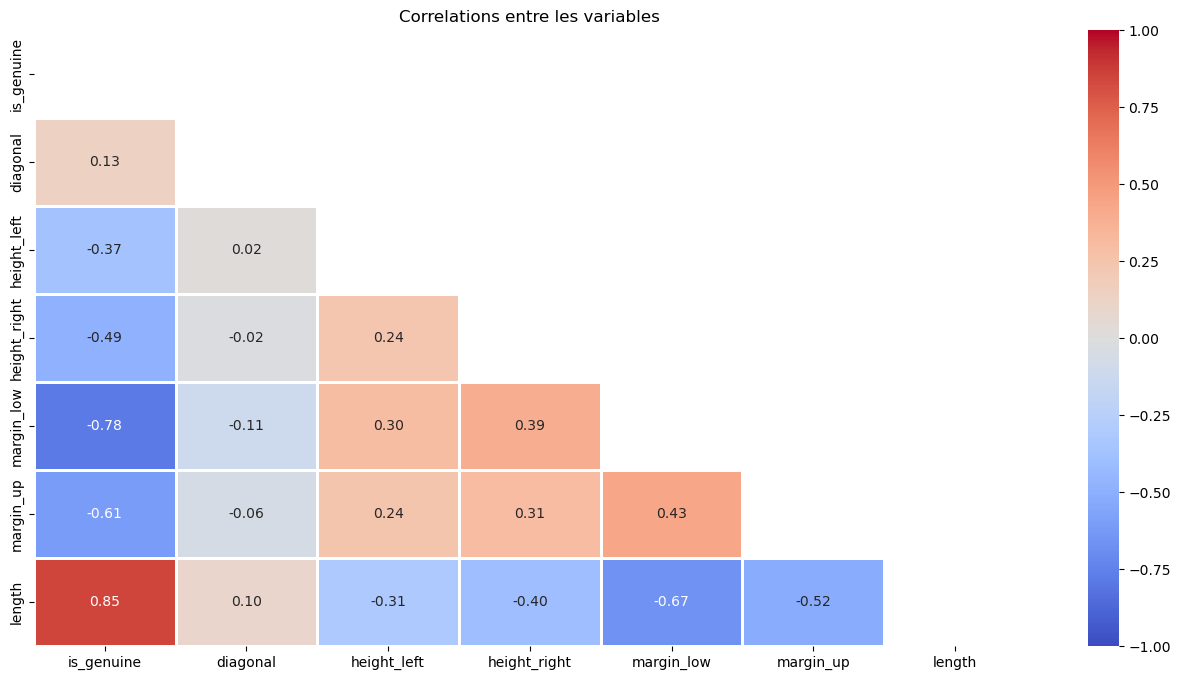

Correlations positives supérieures à 0.5 :
is_genuine - length: 0.85

Correlations negatives inférieures à -0.5 :
is_genuine - margin_low: -0.78
is_genuine - margin_up: -0.61
margin_low - length: -0.67
margin_up - length: -0.52


In [7]:
lt.mtx_corr (billets_no_nan)

## Régression linéaire multiple

In [8]:
#On enleve les colonnes de type bool pour eviter les fuites de données (data leaking)

billets_no_nan_no_bool=lt.no_bool_df(billets_no_nan)

# On applique une regression linéaire multiple au df
lt.regression_lin_multi(billets_no_nan_no_bool,"margin_low")

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 17 Jan 2023   Prob (F-statistic):          2.60e-202
Time:                        15:57:59   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

In [9]:
def reg_multiple(var,numero_model):

    numero_model=numero_model
    R2=round(var.rsquared_adj,3)
    AIC=round(var.aic,2)
    if R2 <0.5:
        print(f"Pour le model_{numero_model} l'AIC est de {AIC} et le R2 ajusté est de {R2}")
        print(f"Le R2 ajusté etant inferieur à 0.5 il n'est pas satisfaisant")
        print("")
    else:
        print(f"Pour le model_{numero_model} l'AIC est de {AIC} et le R2 ajusté est de {R2}")
        print(f"Le R2 ajusté etant superieur ou egal à 0.5 il peut être consideré comme satisfaisant")
        print("")
    
    return R2,AIC


In [10]:
reg_multi_billets_no_nan_0 = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data= billets_no_nan).fit()
reg_multi_billets_no_nan_1 = smf.ols('margin_low ~ height_left + height_right + margin_up + length', data= billets_no_nan).fit()
reg_multi_billets_no_nan_2 = smf.ols('margin_low ~ height_right + margin_up + length', data= billets_no_nan).fit()
reg_multi_billets_no_nan_3 = smf.ols('margin_low ~ margin_up + length', data= billets_no_nan).fit()
reg_multi_billets_no_nan_4 = smf.ols('margin_low ~ length', data= billets_no_nan).fit()

# On apllique la regression lineaire multiple à chaques variables créées précédement.
# On renseigne les noms de R2 et AIC qui seront retournés.
R2_model_0,AIC_model_0 =reg_multiple(reg_multi_billets_no_nan_0,0)
R2_model_1,AIC_model_1 =reg_multiple(reg_multi_billets_no_nan_1,1)
R2_model_2,AIC_model_2 =reg_multiple(reg_multi_billets_no_nan_2,2)
R2_model_3,AIC_model_3 =reg_multiple(reg_multi_billets_no_nan_3,3)
R2_model_4,AIC_model_4 =reg_multiple(reg_multi_billets_no_nan_4,4)

d={
    "AIC":[AIC_model_0,AIC_model_1,AIC_model_2,AIC_model_3,AIC_model_4],
    "R2":[R2_model_0,R2_model_1,R2_model_2,R2_model_3,R2_model_4]
}
reg_multi_billets_no_nan_AIC_R2 = pd.DataFrame(d,index=["model_0","model_1","model_2","model_3","model_4"])
reg_multi_billets_no_nan_AIC_R2


Pour le model_0 l'AIC est de 2014.65 et le R2 ajusté est de 0.476
Le R2 ajusté etant inferieur à 0.5 il n'est pas satisfaisant

Pour le model_1 l'AIC est de 2019.84 et le R2 ajusté est de 0.473
Le R2 ajusté etant inferieur à 0.5 il n'est pas satisfaisant

Pour le model_2 l'AIC est de 2033.59 et le R2 ajusté est de 0.468
Le R2 ajusté etant inferieur à 0.5 il n'est pas satisfaisant

Pour le model_3 l'AIC est de 2071.81 et le R2 ajusté est de 0.454
Le R2 ajusté etant inferieur à 0.5 il n'est pas satisfaisant

Pour le model_4 l'AIC est de 2095.64 et le R2 ajusté est de 0.444
Le R2 ajusté etant inferieur à 0.5 il n'est pas satisfaisant



,AIC,R2
model_0,2014.65,0.476
model_1,2019.84,0.473
model_2,2033.59,0.468
model_3,2071.81,0.454
model_4,2095.64,0.444


### Analyse des resultats 

In [11]:
# les tests seront réalisé à un niveau 𝛼=5 % 
alpha=0.05
# On recupere 𝑛 , le nombre d'individus de l'échantillon, et  𝑝 , le nombre de variables.
n=billets_no_nan.shape[0]
p=5

In [12]:
#Creation d'un df pour analyser les valeurs atypiques et /ou influentes
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})


#### Calcul des leviers

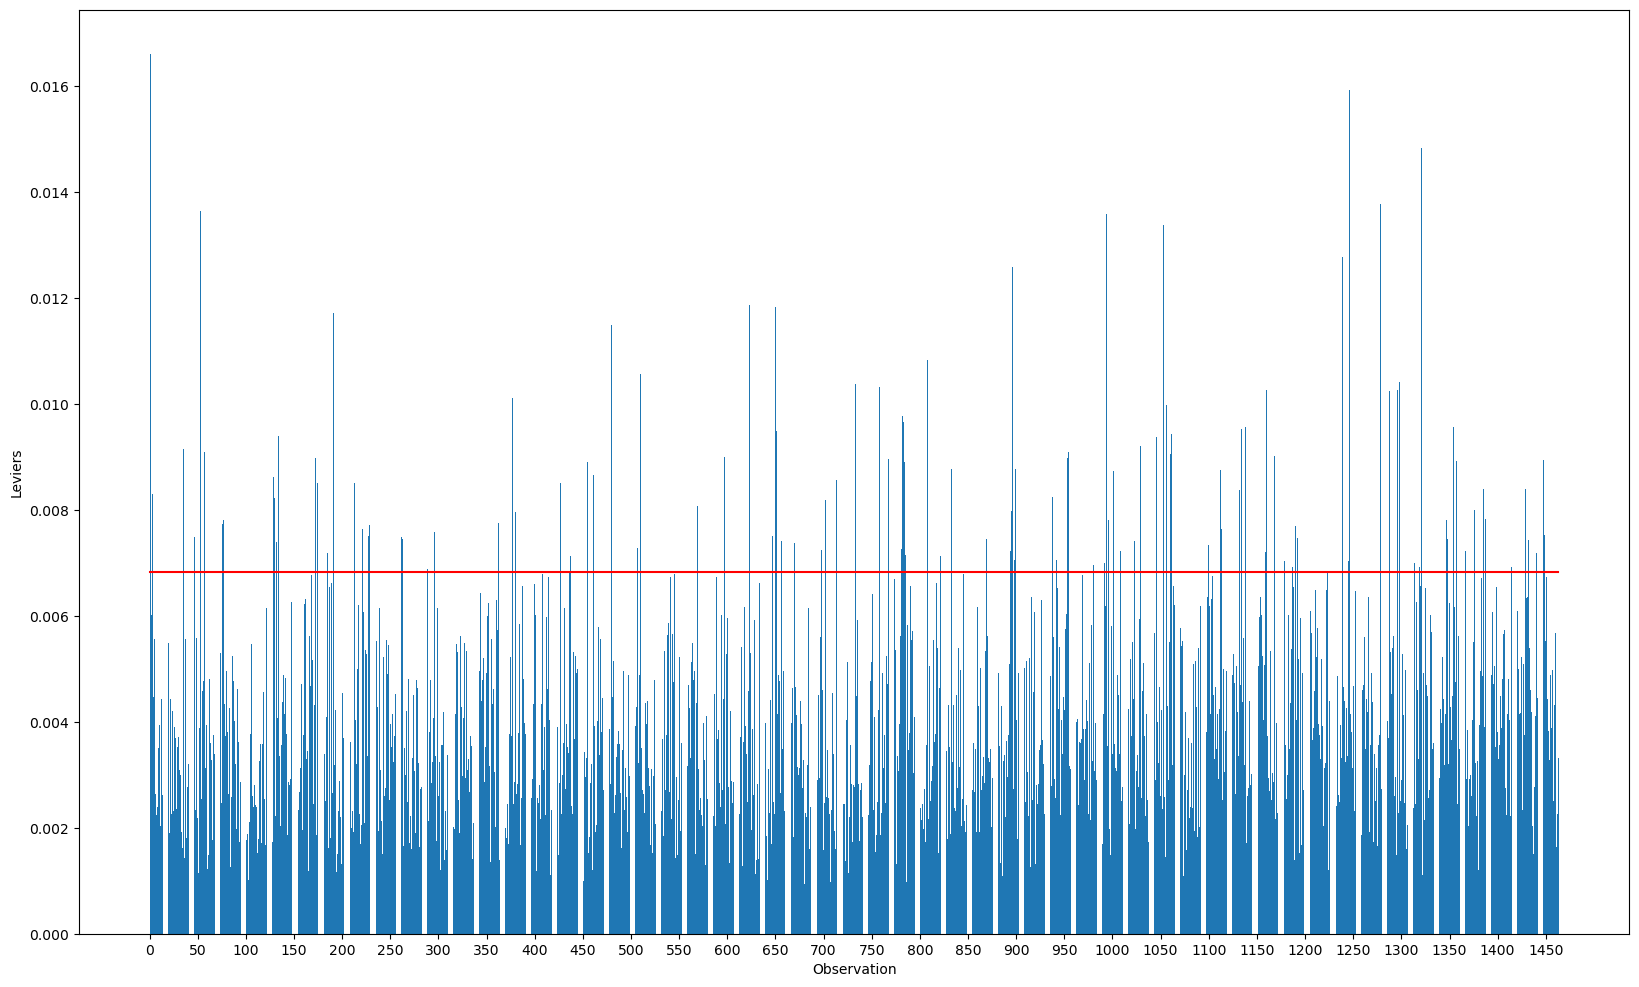

Le seuil de dépassement des leviers est de : 0.00683526999316473
Le nombre de points pour lesquels le levier est superieur au seuil est de: 148


In [13]:
#Ajout de la variable "levier" et ses valeurs au df analyses
analyses['levier'] = reg_multi_billets_no_nan_0.get_influence().hat_matrix_diag

#calcule du seuil de levier
seuil_levier = 2*p/n

#Representation graphique
plt.figure(figsize=(20,12))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, n, step=50))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n], [seuil_levier, seuil_levier], color='r')
plt.show()

#On sélectionne les points pour lesquels le levier est supérieur au seuil 
lev_sup_seuil=analyses.loc[analyses['levier'] > seuil_levier, :]
print(f"Le seuil de dépassement des leviers est de : {seuil_levier}")
print(f"Le nombre de points pour lesquels le levier est superieur au seuil est de: {lev_sup_seuil.shape[0]}")

#### Calcul des résidus studentisés

In [14]:
#On ajoute une variable "rstudent" au df analyses contenant le calcul des residus studentisés
analyses['rstudent'] = reg_multi_billets_no_nan_0.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)



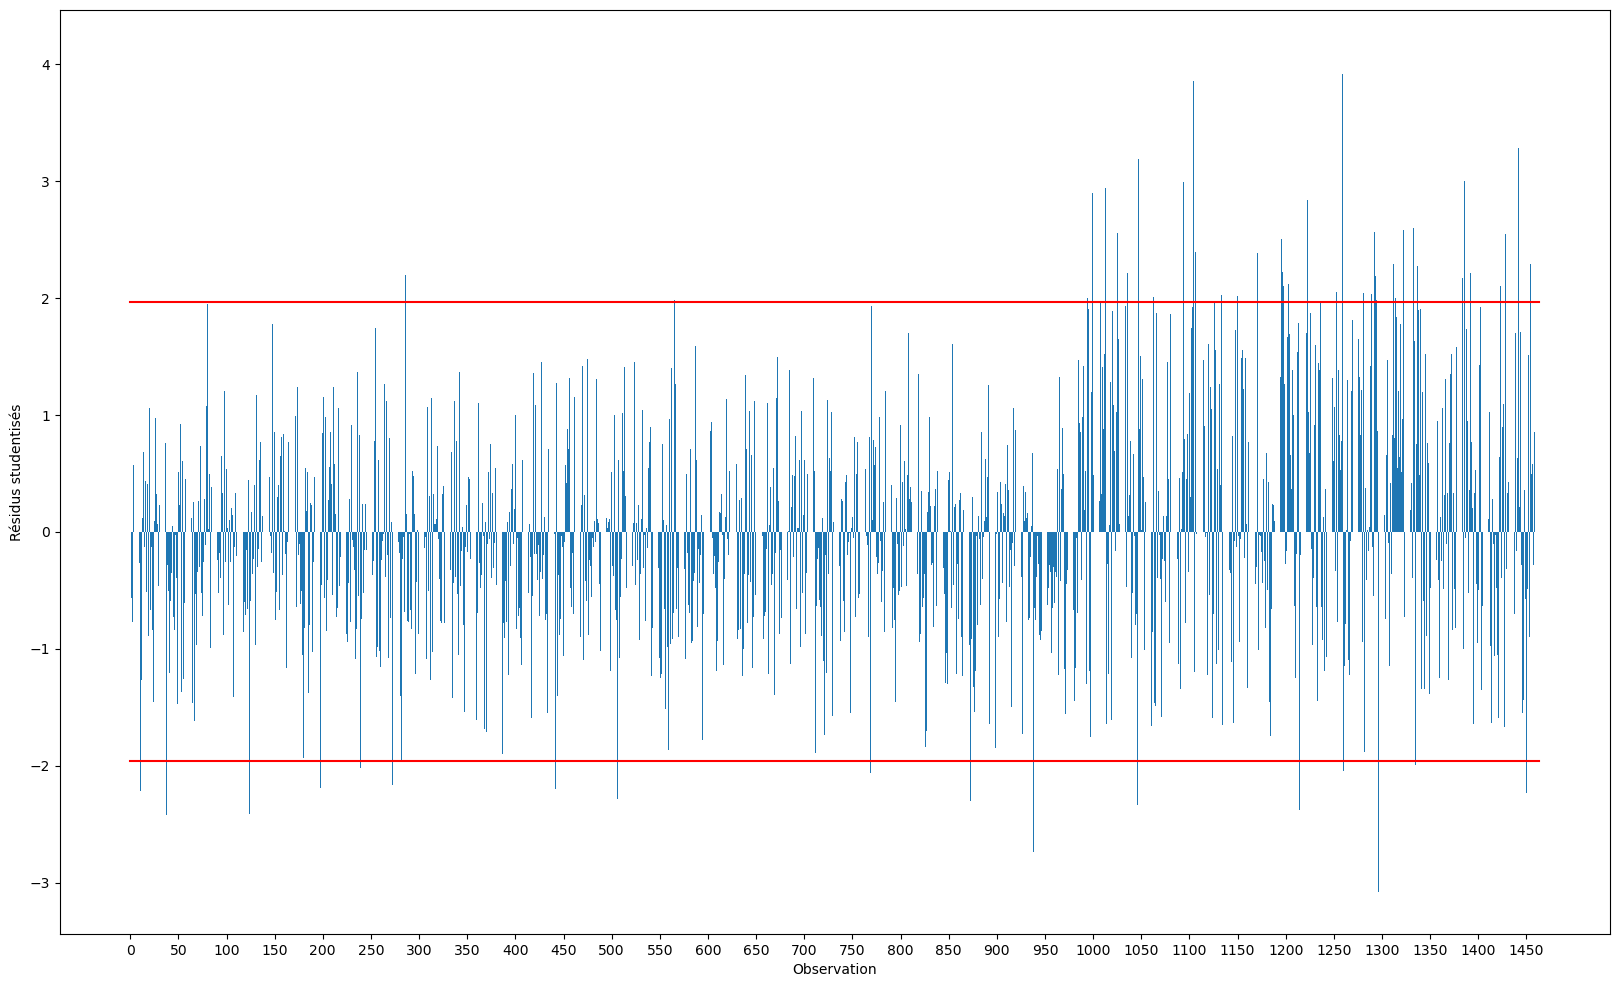

Le seuil de dépassement des residus studentisés est de : 1.9615935038492915
Le nombre de résidus studentisés dépassant le seuil est de : 53


In [15]:
#Representation graphique

plt.figure(figsize=(20,12))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n, step=50))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

rstudent_sup_seuil=analyses.loc[analyses['rstudent'] > seuil_rstudent, :]
print(f"Le seuil de dépassement des residus studentisés est de : {seuil_rstudent}")
print(f"Le nombre de résidus studentisés dépassant le seuil est de : {rstudent_sup_seuil.shape[0]}")

#### Distance de Cook

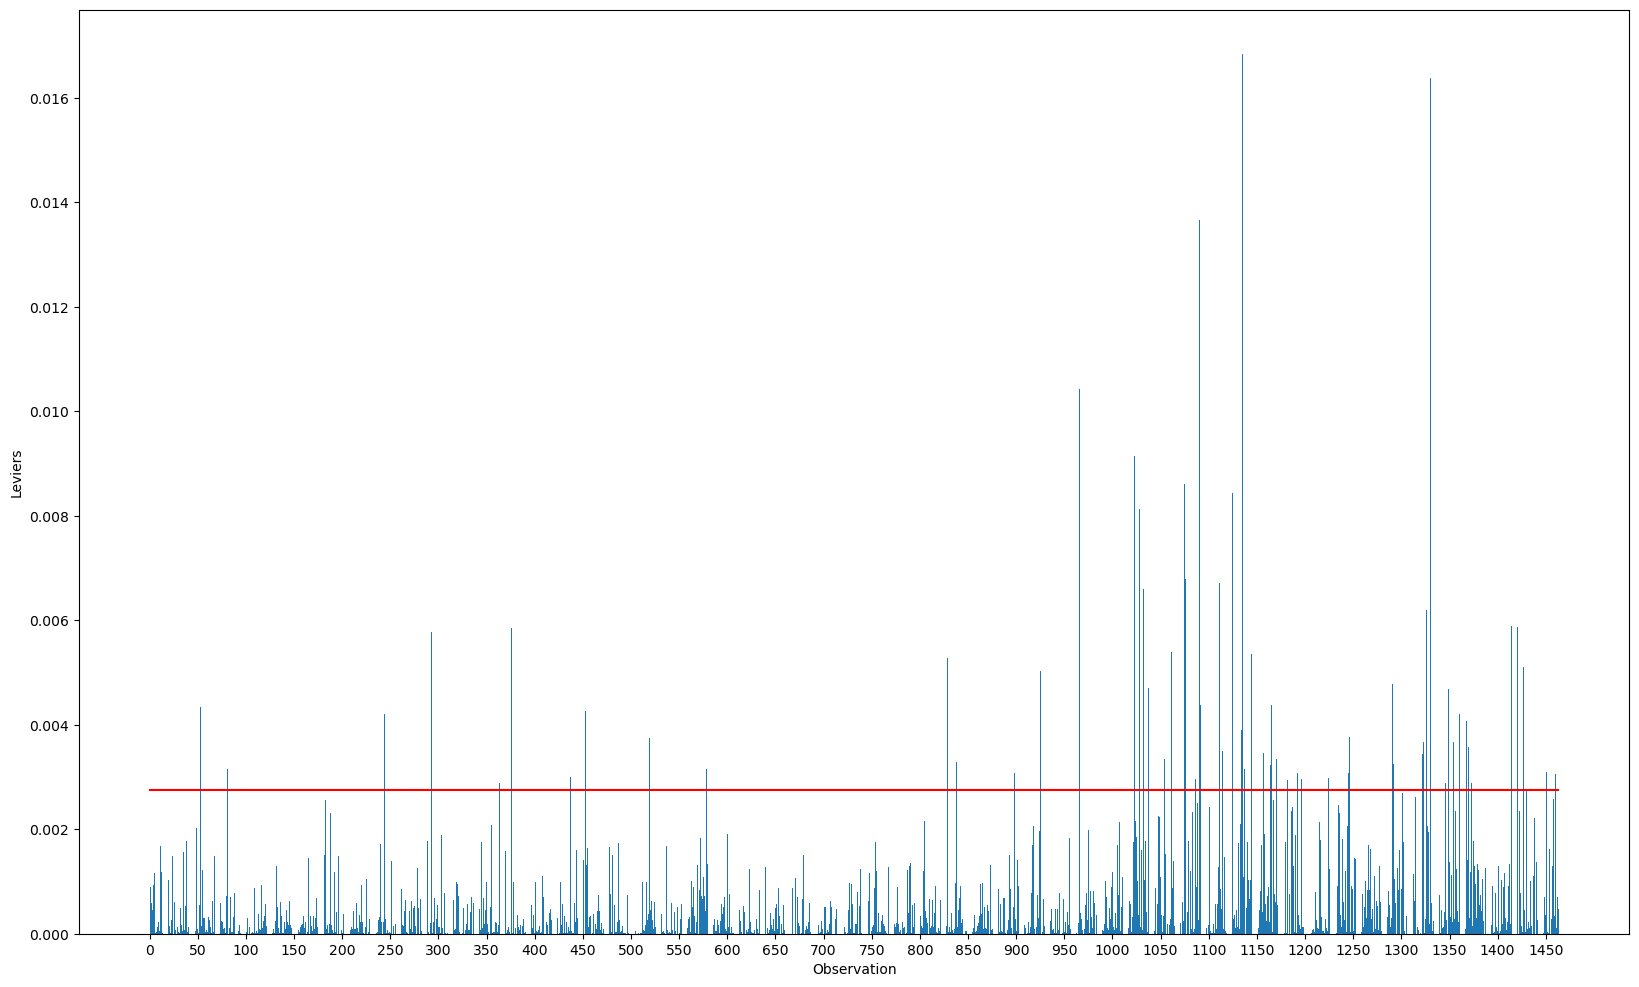

Le seuil de dépassement de la distance de cook est de : 0.0027434842249657062
Le nombre de points atypiques dépassant le seuil est de : 80


In [16]:
#Calcul de la distancede cook
influence = reg_multi_billets_no_nan_0.get_influence().summary_frame()
#On ajoute la variable "dcooks" au df analyses
analyses['dcooks'] = influence['cooks_d']
#Calcul du seuil de cook
seuil_dcook = 4/(n-p)
#Representation graphique
plt.figure(figsize=(20,12))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, n, step=50))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n], [seuil_dcook, seuil_dcook], color='r')
plt.show()

dcooks_sup_seuil=analyses.loc[analyses['dcooks'] > seuil_dcook, :]
print(f"Le seuil de dépassement de la distance de cook est de : {seuil_dcook}")
print(f"Le nombre de points atypiques dépassant le seuil est de : {dcooks_sup_seuil.shape[0]}")

In [17]:
lt.nan_control(influence)

le dataframe ne contient pas de NaN 


#### Test de colinéarité

In [18]:
variables = reg_multi_billets_no_nan_0.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0136128990686282,
 1.1382605736082494,
 1.2301145155560378,
 1.4044037781843617,
 1.5769501453665788]

#### Test de l'homoscédasticité (Breusch Pagan)

La p_value en suivant le test Breusch Pagan est de :0.000000
La p_value est inferieur à 5% , l'hypothese H0 selon laquelle les variances sont constantes (homoscédasticité) est rejeté



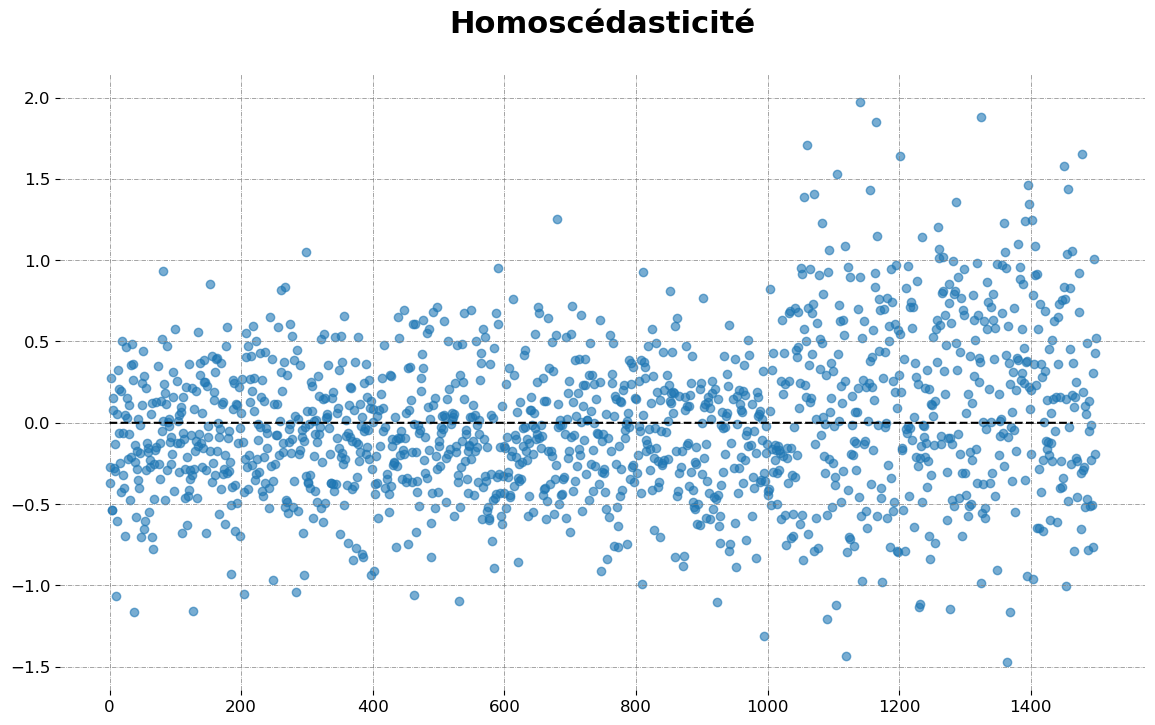

In [19]:
#Ajout de la colonne residus au df anlyses
analyses["residus"]=reg_multi_billets_no_nan_0.resid

# On effectue un test de Breusch Pagan pour tester l'homoscédasticité.
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_billets_no_nan_0.resid, variables)
if pval < alpha:
    
    print('La p_value en suivant le test Breusch Pagan est de :{0:f}'.format(pval))
    print("La p_value est inferieur à 5% , l'hypothese H0 selon laquelle les variances sont constantes (homoscédasticité) est rejeté")
    
else:
    print('La p_value en suivant le test Breusch Pagan est de :{0:f}'.format(pval))
    print("La p_value est superieur ou egale à 5% , l'hypothese H0 selon laquelle les variances sont constantes (homoscédasticité) est retenue")
print("")    
individus=billets_no_nan.index
residus=analyses["residus"]
# Graphique:

fig, ax = plt.subplots(figsize = (14,8))
ax.set_title("Homoscédasticité",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.scatter(x = individus, y = residus, alpha=0.6)
plt.plot(np.repeat(0, len(individus)+2), color="Black", linestyle='--')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

#### test de la normalité des résidus

In [20]:
def shapiro_test(data,titre):
    stat, p = stats.shapiro(data)
    print("P-value: ", p)
    if p > 0.05:
        print("On ne rejette pas l'hypothèse nulle.")
        print("La distribution suit une loi normale.")
    else:
        print("On rejette l'hypothèse nulle.")
        print("La distribution ne suit pas une loi normale.")
        
        #Representation graphique
    fig, ax = plt.subplots(figsize = (14,8))
    ax.set_title(titre,
     fontsize=22, weight='bold', color='Black', loc='center',pad=30)
    plt.box(False)
    ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
    ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

    sns.histplot(data, kde=True)
    plt.ylabel("Nombre", weight='bold', size=16)
    plt.xlabel("individus", weight='bold', size=16)
    plt.yticks(np.arange(0, 150, 10))
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
        
        
    
    plt.show()

P-value:  1.0
On ne rejette pas l'hypothèse nulle.
La distribution suit une loi normale.


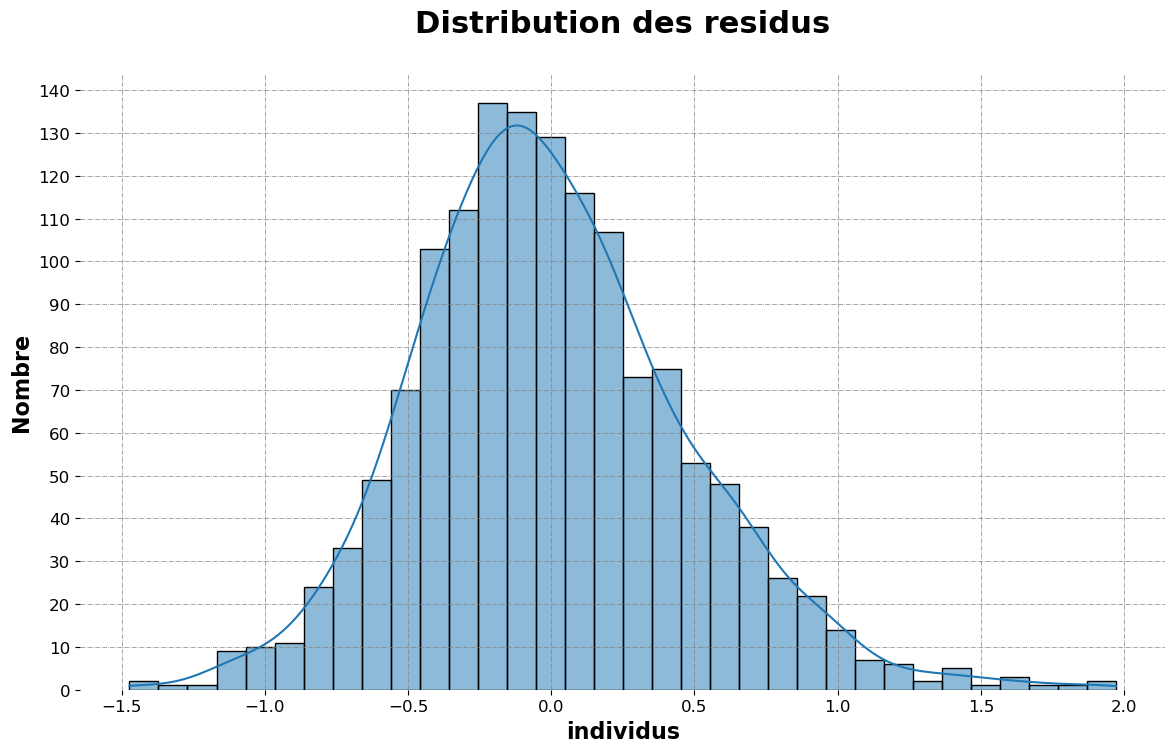

In [21]:
# On effectue un test de Shapiro pour verifier si la population suit une loi normale

lt.shapiro_test(analyses["residus"],"Distribution des residus")

## Outliers

### Identification des outliers

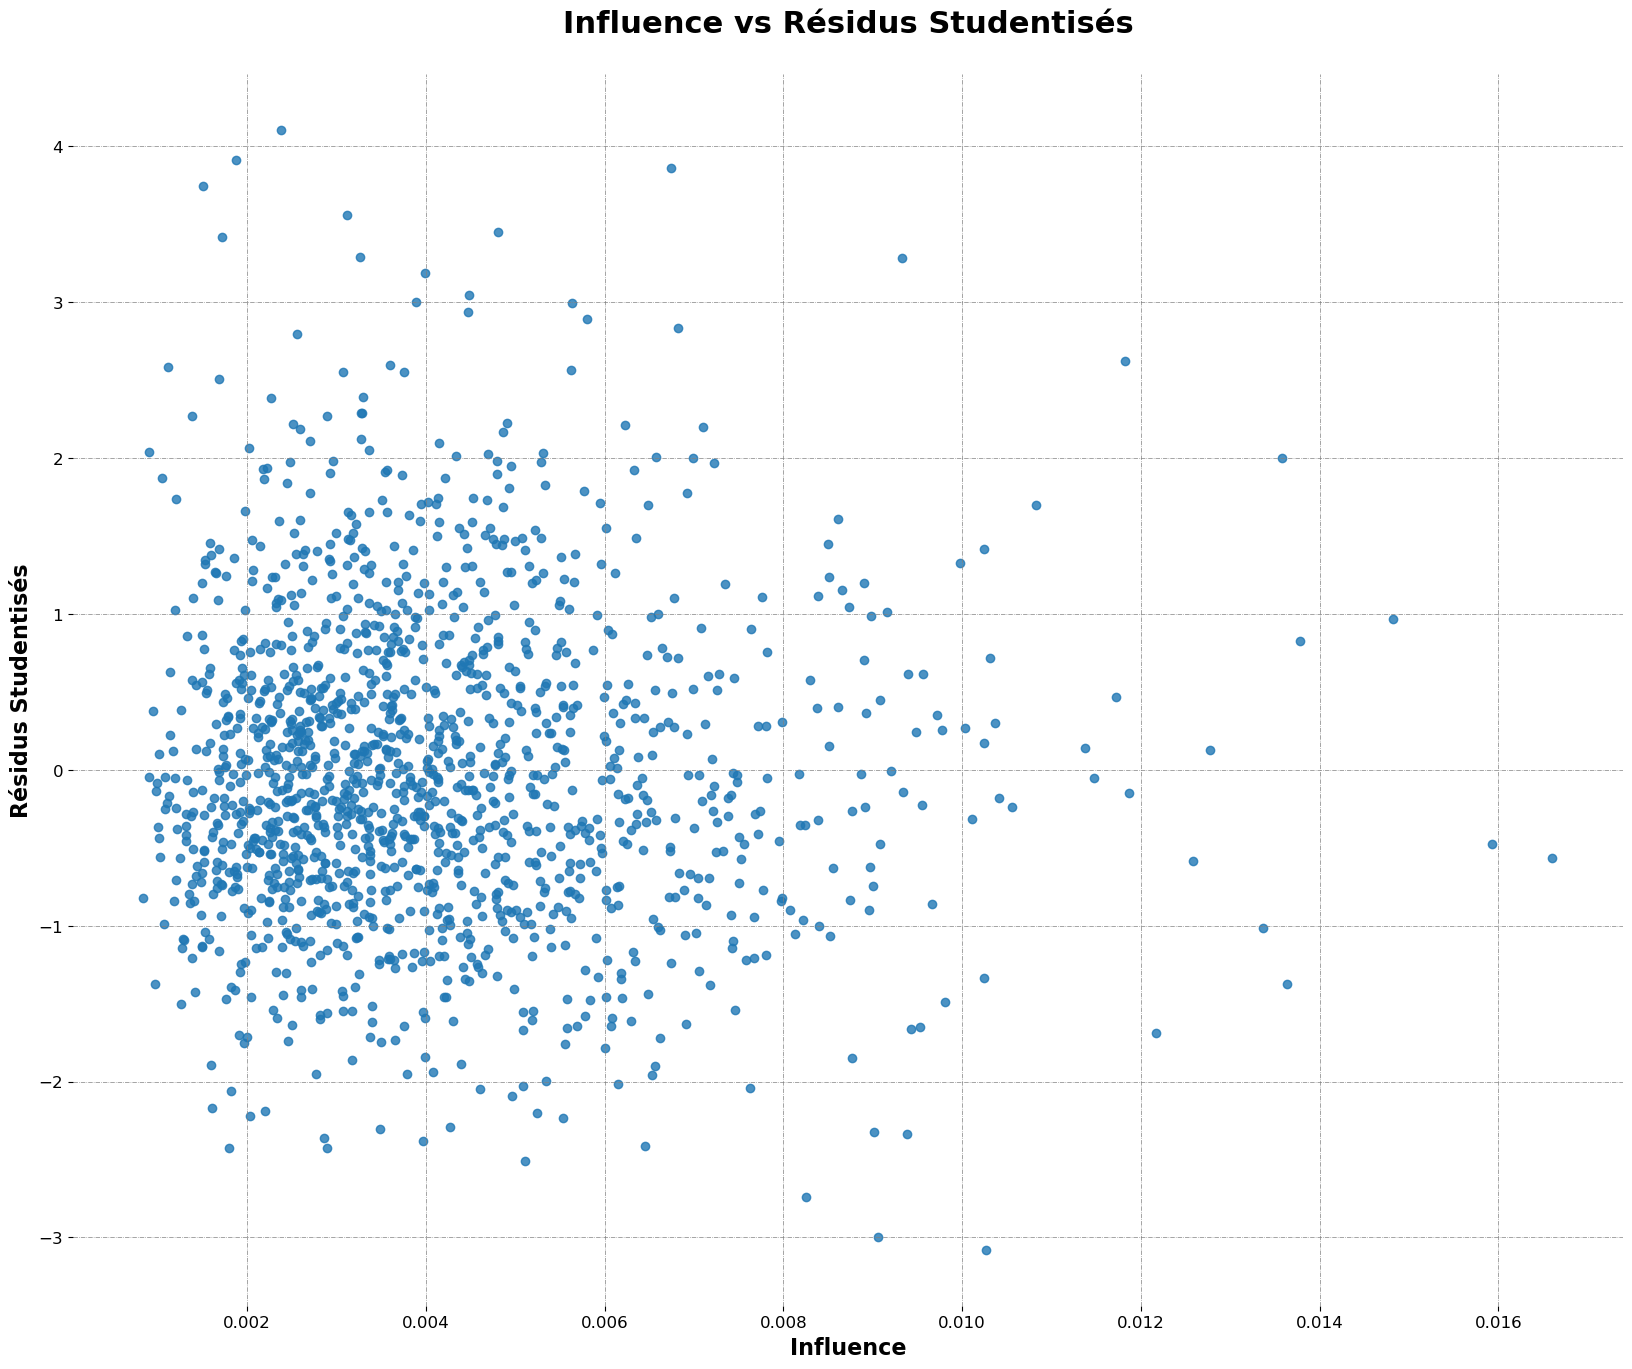

In [22]:
levier = reg_multi_billets_no_nan_0.get_influence().hat_matrix_diag
res_student=analyses['rstudent']

# Graphique:

fig, ax = plt.subplots(figsize = (20,16))
ax.set_title("Influence vs Résidus Studentisés",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
sns.regplot(x = levier, y = res_student, fit_reg=False)
plt.ylabel("Résidus Studentisés", weight='bold', size=16)
plt.xlabel("Influence", weight='bold', size=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()



In [23]:


d={"type":["seuil","nombre"],
   "levier":[seuil_levier,lev_sup_seuil.shape[0]],
   'r_student':[seuil_rstudent,rstudent_sup_seuil.shape[0]],
   "dcooks":[seuil_dcook,dcooks_sup_seuil.shape[0]]
  }
outliers_billets_no_nan = pd.DataFrame(data=d).set_index("type").T.astype({"nombre": 'int32'})

outliers_billets_no_nan

type,seuil,nombre
levier,0.006835,148
r_student,1.961594,53
dcooks,0.002743,80


Avec la methode z_score et en choisissant un seuil de 3, le nombre d'outliers est de 17.
---------------------------------------------------------------------------------------------------------------
mediane = 0.0036450628287562903
Q1 = 0.002560758138370292
Q3 = 0.005140437367260664
IQR = 0.0
---------------------------------------------------------------------------------------------------------------
Analyse univarié

count    1463.000000
mean        0.004101
std         0.002134
min         0.000840
25%         0.002561
50%         0.003645
75%         0.005140
max         0.016606
Name: levier, dtype: float64
---------------------------------------------------------------------------------------------------------------
Le seuil max est de 0.01 et le nombre d'outliers est de 26 
---------------------------------------------------------------------------------------------------------------
       obs    levier  rstudent    dcooks   residus
0        1  0.016606 -0.563593  0.000894 -0

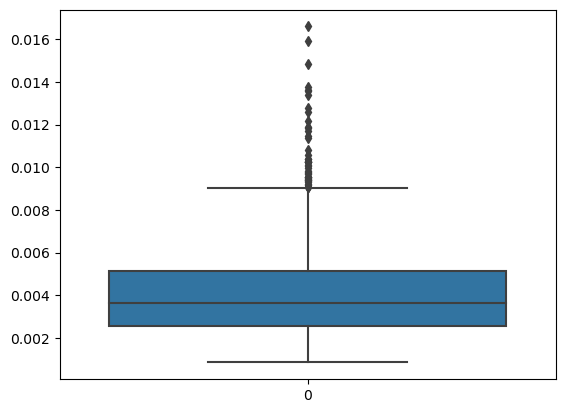

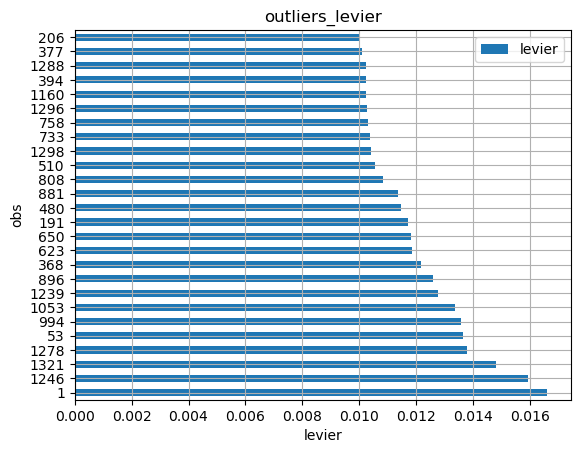

Avec la methode z_score et en choisissant un seuil de 3, le nombre d'outliers est de 13.
---------------------------------------------------------------------------------------------------------------
mediane = -0.08684370079639721
Q1 = -0.6607057372631022
Q3 = 0.5705355168690074
IQR = 1.23
---------------------------------------------------------------------------------------------------------------
Analyse univarié

count    1463.000000
mean       -0.000033
std         1.000452
min        -3.078575
25%        -0.660706
50%        -0.086844
75%         0.570536
max         4.104577
Name: rstudent, dtype: float64
---------------------------------------------------------------------------------------------------------------
Le seuil max est de 2.42 et le nombre d'outliers est de 24 
---------------------------------------------------------------------------------------------------------------
       obs    levier  rstudent        dcooks   residus
1080  1081  0.002384  4.104577  1.199160

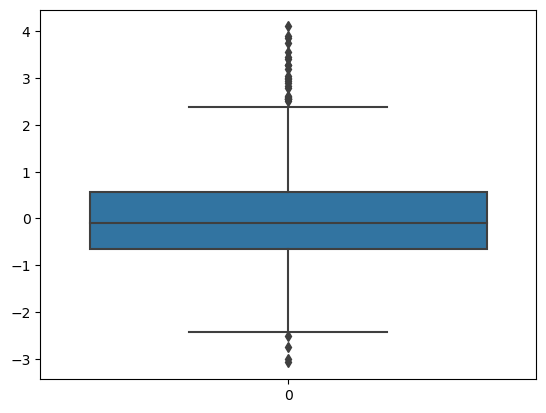

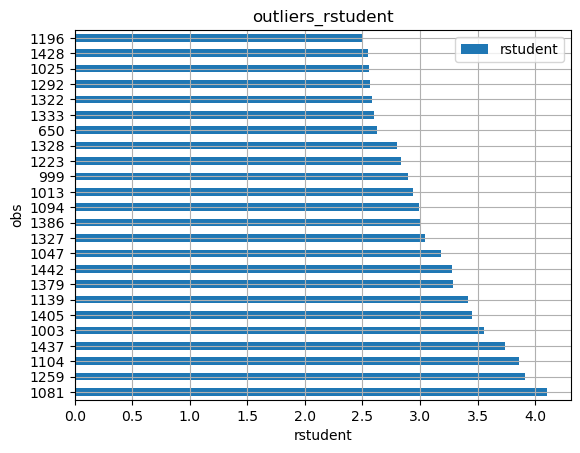

Avec la methode z_score et en choisissant un seuil de 3, le nombre d'outliers est de 0.
---------------------------------------------------------------------------------------------------------------
mediane = nan
Q1 = nan
Q3 = nan
IQR = nan
---------------------------------------------------------------------------------------------------------------
Analyse univarié

count    1.426000e+03
mean     7.048908e-04
std      1.403879e-03
min      4.971272e-09
25%      4.847647e-05
50%      2.203891e-04
75%      7.558528e-04
max      1.684761e-02
Name: dcooks, dtype: float64
---------------------------------------------------------------------------------------------------------------
Le seuil max est de nan et le nombre d'outliers est de 0 

Avec la methode z_score et en choisissant un seuil de 3, le nombre d'outliers est de 0.
---------------------------------------------------------------------------------------------------------------
mediane = nan
Q1 = nan
Q3 = nan
IQR = nan
----------

In [24]:
lt.outliers_full (analyses,"levier",3,"outliers_levier","levier","obs")
lt.outliers_full (analyses,"rstudent",3,"outliers_rstudent","rstudent","obs")
lt.outliers_full (analyses,"dcooks",3,"outliers_dcooks","dcooks","obs")
lt.outliers_full (analyses,"residus",3,"outliers_residus","residus","obs")



## Predictions

### Preparation et remplacement des valeurs NaN

In [25]:
#On enleve la colonne contenant les nan
x_nan = billets_nan.drop(['margin_low'], axis=1)
#On remplace les nan par une prediction sortie de la regression lineaire multiple.
y_nan = reg_multi_billets_no_nan_0.predict(x_nan)
#On reconstitue le df avec les valeur nan remplacées par la prédiction
x_nan['margin_low'] = y_nan
# On controle le df
lt.nan_control(x_nan)
x_nan.head()

le dataframe ne contient pas de NaN 


,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,True,171.94,103.89,103.45,3.25,112.79,4.318525
99,True,171.93,104.07,104.18,3.14,113.08,4.393668
151,True,172.07,103.80,104.38,3.02,112.93,4.410457
197,True,171.45,103.66,103.80,3.62,113.27,4.319014
241,True,171.83,104.14,104.06,3.02,112.36,4.650617


### Ajout des valeurs manquantes dans le df de départ

In [26]:
# On ajoute les lignes completées
billets = pd.concat([billets_no_nan, x_nan])
lt.nan_control(billets)
billets.describe()

le dataframe ne contient pas de NaN 


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483475,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659632,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


# Partie 2 Exploration des données

## Caracteristiques booléennes des données

Le dataset contient 1500 billets. 
Vrai billets: 1000 
Faux billets : 500


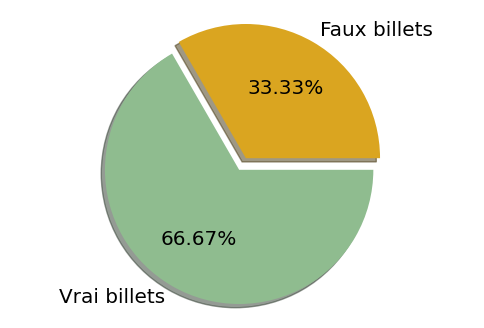

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90116,104.19034,104.14362,5.214079,3.35016,111.63064
True,171.98708,103.94913,103.80865,4.118174,3.05213,113.20243


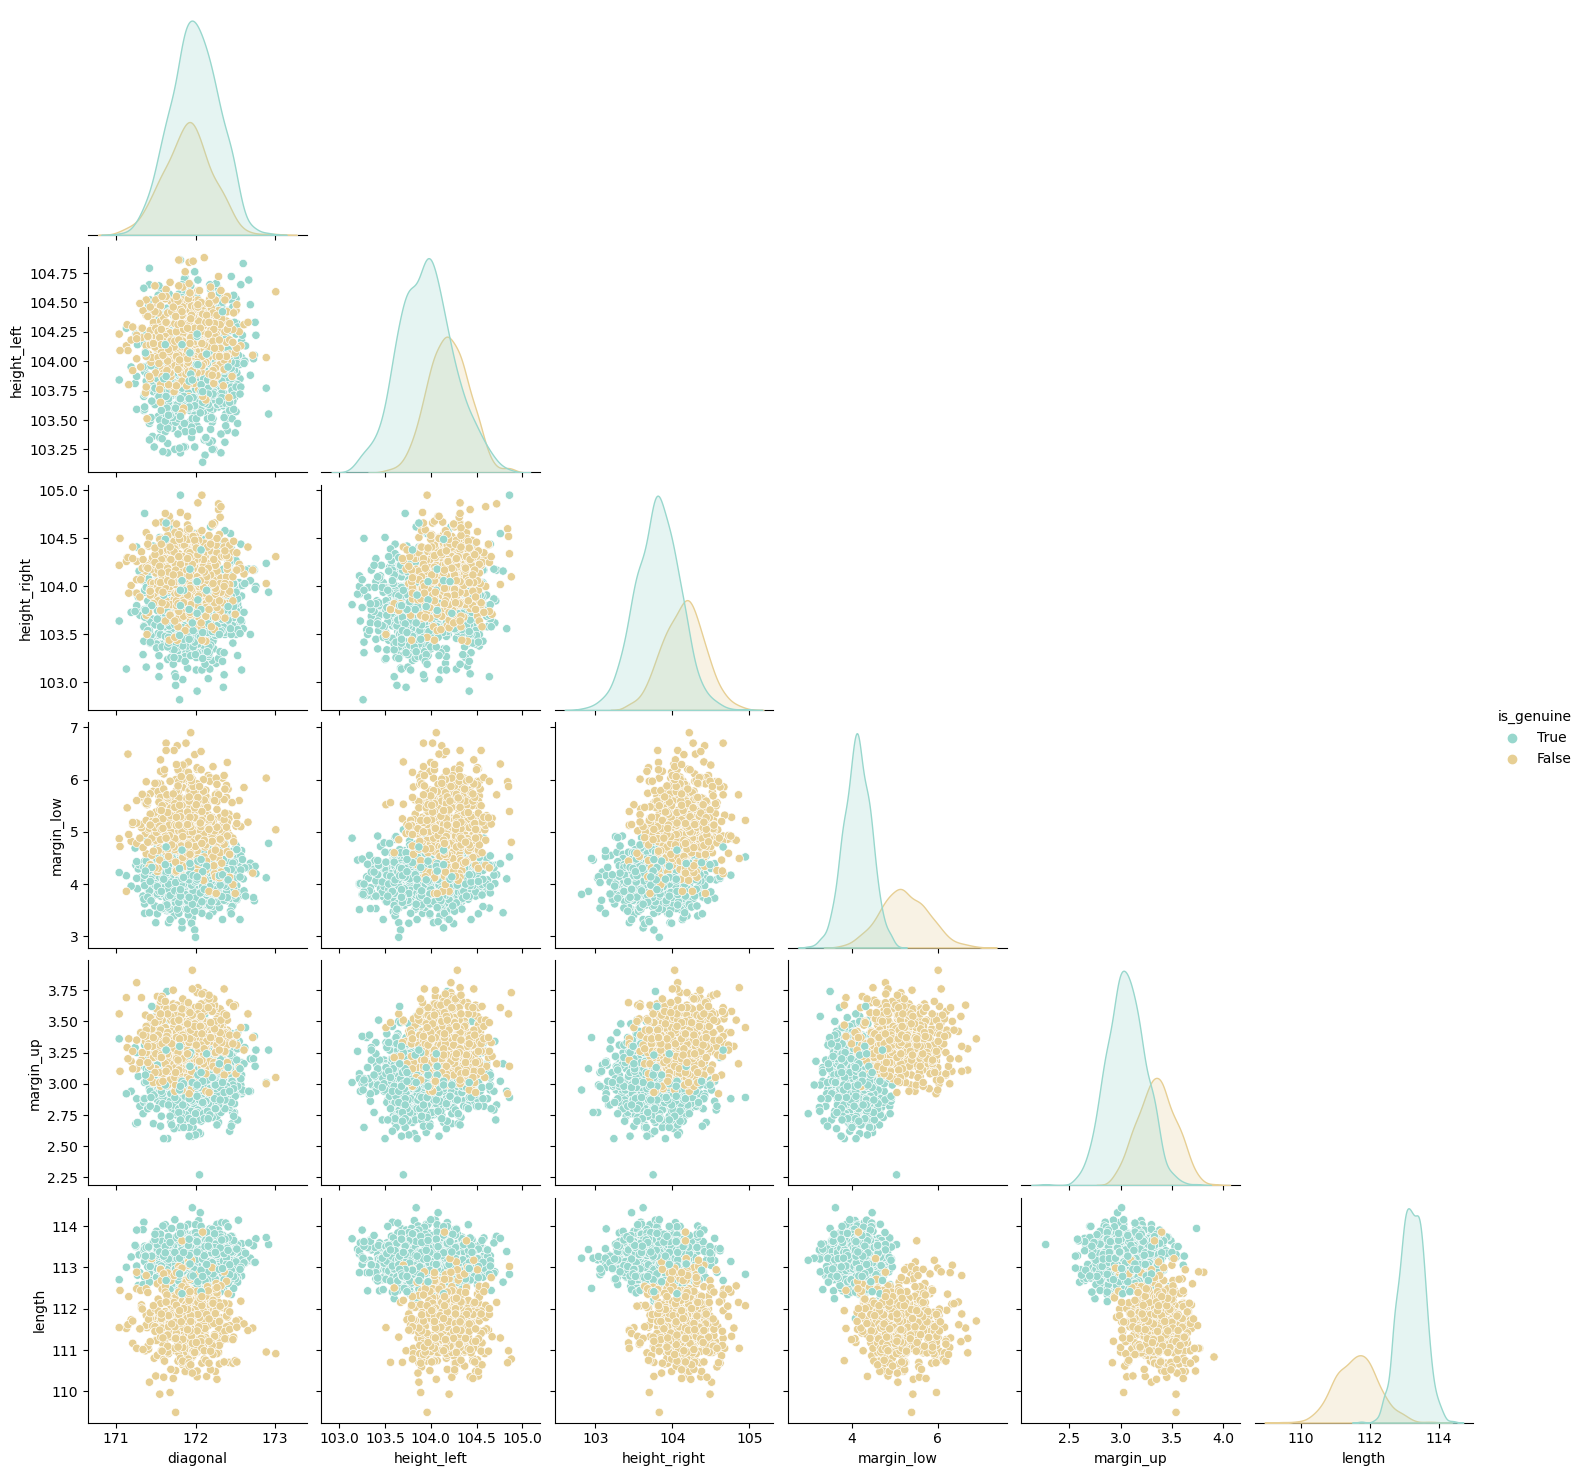

In [27]:
# Analyse des données booléennes du dataset

billets_True=billets[billets["is_genuine"] == True]
billets_False=billets[billets["is_genuine"] == False]
nb_billets=billets.shape[0]
nb_billets_True=billets_True.shape[0]
nb_billets_False=billets_False.shape[0]
print(f"Le dataset contient {nb_billets} billets. \nVrai billets: {nb_billets_True} \nFaux billets : {nb_billets_False}")



# Graphique:
fig1, ax1 = plt.subplots(figsize = (6,4))

plt.box(False)
ax1.pie(billets.groupby(["is_genuine"])["diagonal"].count(),
        labels=["Faux billets","Vrai billets"],
        explode= (0, 0.1), 
        autopct="%1.2f%%",
        textprops={'size': 'x-large'},
        colors=["goldenrod","darkseagreen"],
        shadow=True)
ax1.axis("equal")
plt.show()

# Billets moyens selon l'authenticitee:
display(billets.groupby(["is_genuine"]).mean())

# Regroupent en nuage de point (pairplot)

sns.pairplot(billets, hue="is_genuine",hue_order =[True,False] , palette='BrBG_r',corner=True)
plt.show()



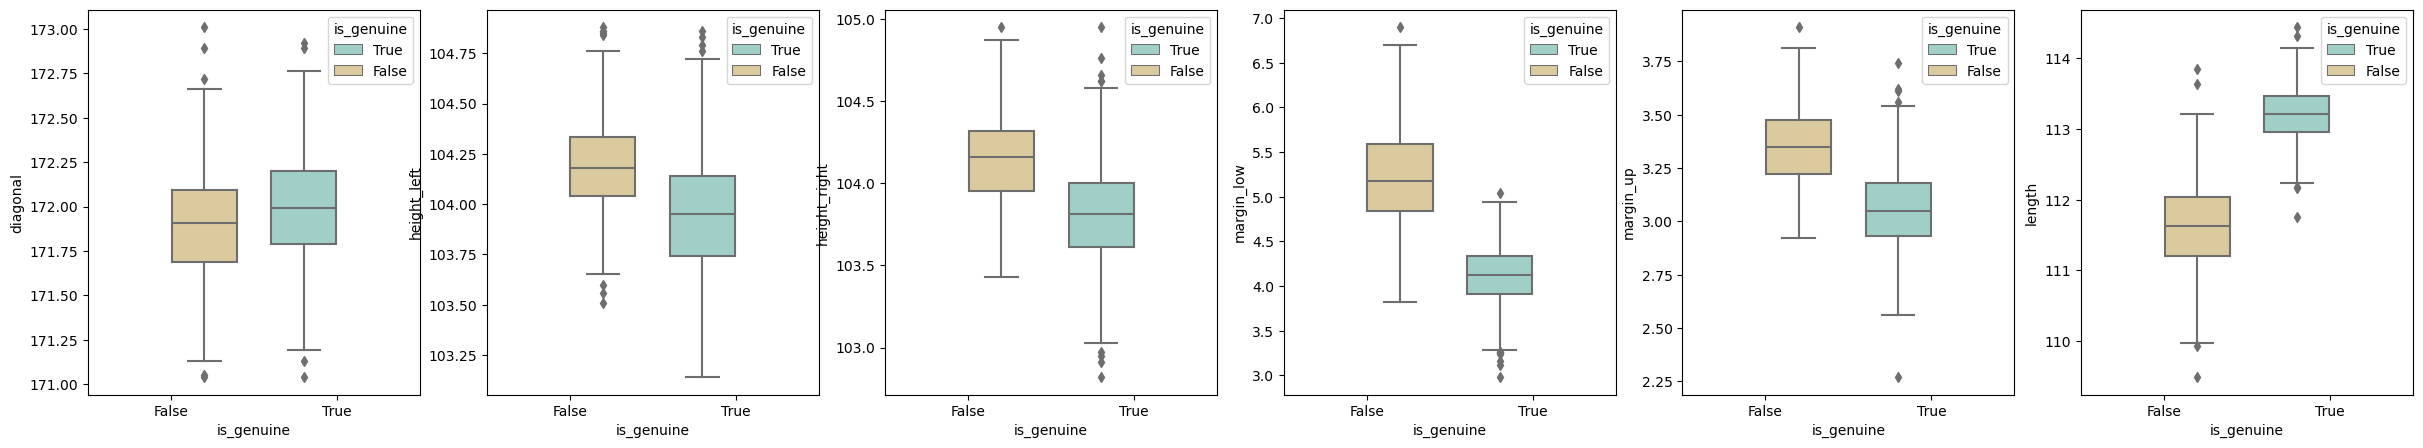

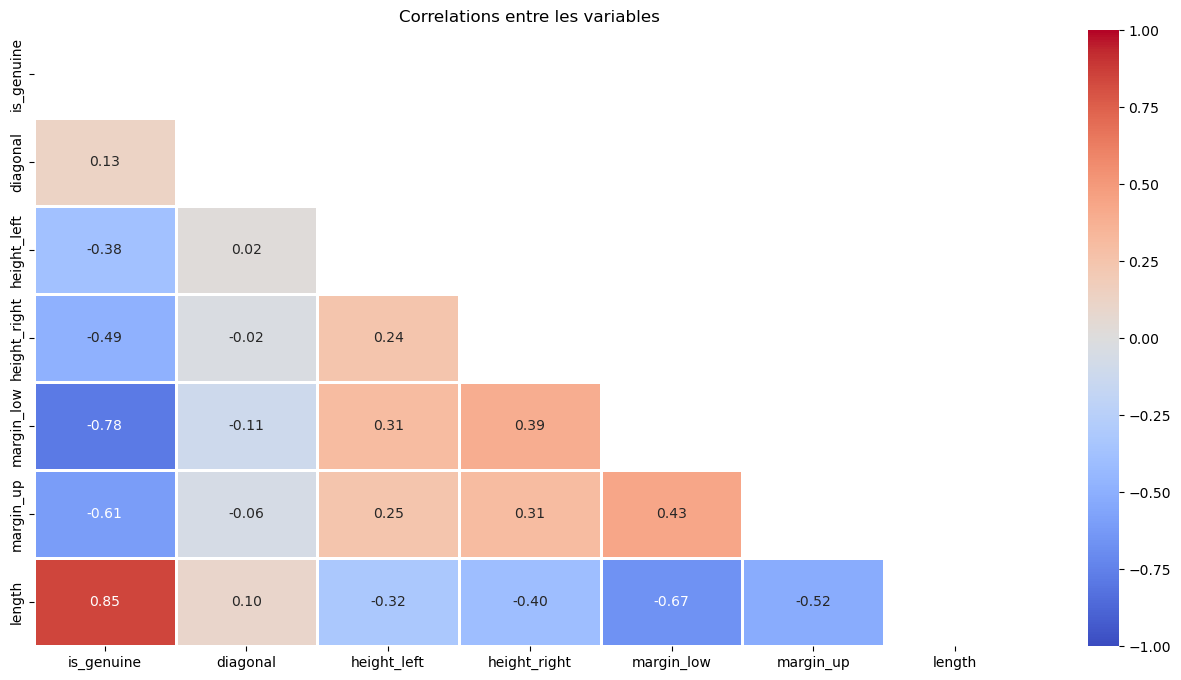

Correlations positives supérieures à 0.5 :
is_genuine - length: 0.85

Correlations negatives inférieures à -0.5 :
is_genuine - margin_low: -0.78
is_genuine - margin_up: -0.61
margin_low - length: -0.67
margin_up - length: -0.52


In [28]:


# On affiche les differents boxplot representant la distribution de chaque variable
fig, ax = plt.subplots(1, 6, figsize=(30, 5))

sns.boxplot(data=billets, hue="is_genuine",hue_order =[True,False], palette='BrBG_r', x="is_genuine",y='diagonal',ax=ax[0])
sns.boxplot(data=billets,hue="is_genuine",hue_order =[True,False], palette='BrBG_r', x='is_genuine',y='height_left' ,ax=ax[1])
sns.boxplot(data=billets,hue="is_genuine",hue_order =[True,False], palette='BrBG_r', x='is_genuine',y= 'height_right' ,ax=ax[2])
sns.boxplot(data=billets,hue="is_genuine",hue_order =[True,False], palette='BrBG_r', x='is_genuine',y= 'margin_low' ,ax=ax[3])
sns.boxplot(data=billets,hue="is_genuine",hue_order =[True,False], palette='BrBG_r', x='is_genuine',y= 'margin_up',ax=ax[4])
sns.boxplot(data=billets,hue="is_genuine",hue_order =[True,False], palette='BrBG_r', x='is_genuine',y= 'length' ,ax=ax[5])

plt.show()

#Correlation entre les varibles
lt.mtx_corr(billets)



## Distribution des differentes variables

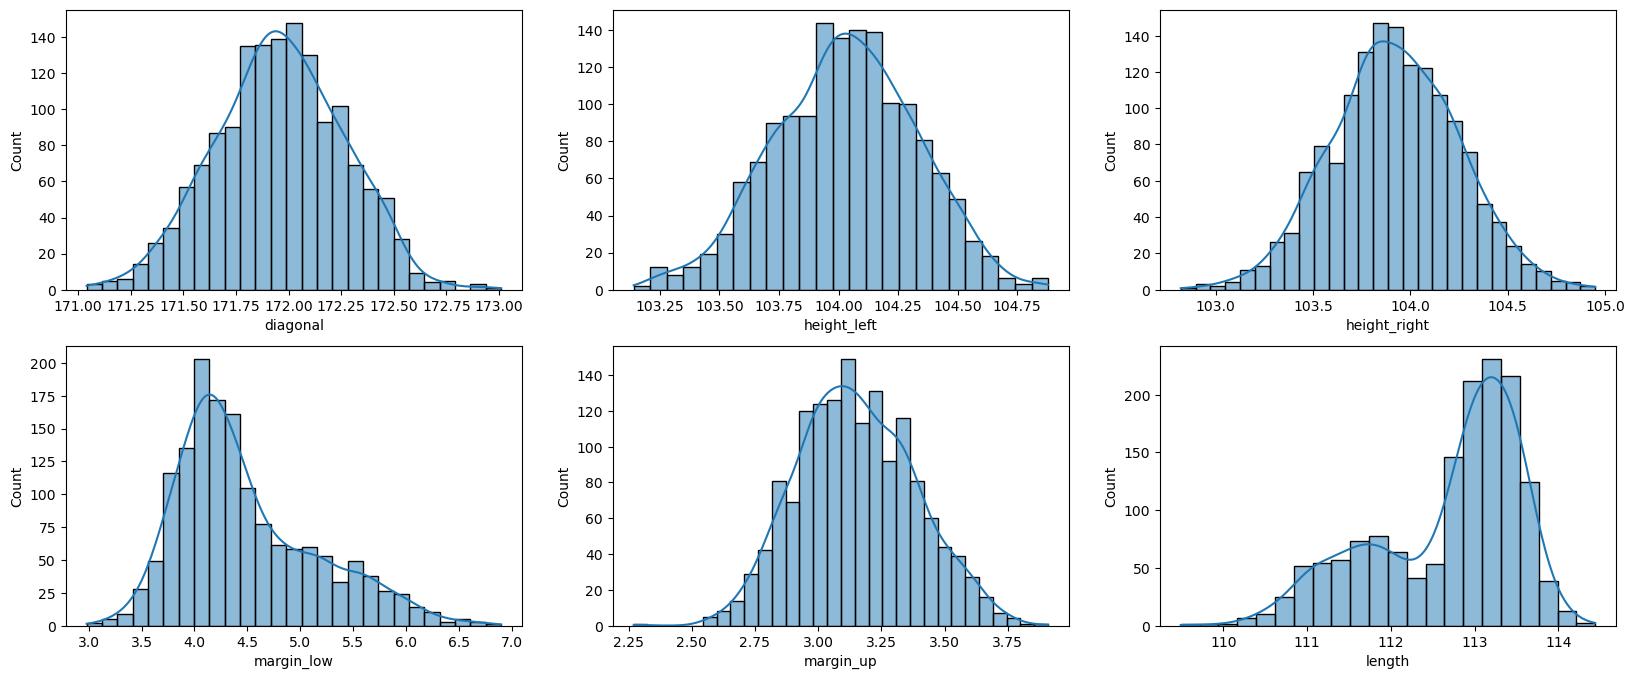

In [29]:
#On copie le df en retirant la colonne is_guenine
billets_2 = billets.iloc[:,1:]
# On affiche les differents graphiques representant la distribution de chaque variable
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

sns.histplot(data=billets_2, x='diagonal', kde=True, ax=axs[0, 0])
sns.histplot(data=billets_2, x='height_left', kde=True, ax=axs[0, 1])
sns.histplot(data=billets_2, x='height_right', kde=True, ax=axs[0, 2])

sns.histplot(data=billets_2, x='margin_low', kde=True, ax=axs[1, 0])
sns.histplot(data=billets_2, x='margin_up', kde=True, ax=axs[1, 1])
sns.histplot(data=billets_2, x='length', kde=True, ax=axs[1, 2])

plt.show()

In [30]:
#ShapiroTest:

alpha = 0.05

for i in billets_2.iloc[:,:]:
    stat, pvalue = stats.shapiro(billets_2[i])
    print(f"{i}: La p_value du test de Shapiro-Wilk  est de: {pvalue}")
    if pvalue > alpha:
        print(f"La p_value est superieur ou egale à {alpha} , l'hypothese H0 selon laquelle la distribution est normal, est toléré") 
        print("")
    else:
        print(f"La p_value est inferieur à {alpha} , l'hypothese H0 selon laquelle la distribution est normal, est rejeté, H1 est toléré")
        print("")
        

diagonal: La p_value du test de Shapiro-Wilk  est de: 0.32343590259552
La p_value est superieur ou egale à 0.05 , l'hypothese H0 selon laquelle la distribution est normal, est toléré

height_left: La p_value du test de Shapiro-Wilk  est de: 0.0509396530687809
La p_value est superieur ou egale à 0.05 , l'hypothese H0 selon laquelle la distribution est normal, est toléré

height_right: La p_value du test de Shapiro-Wilk  est de: 0.9806053638458252
La p_value est superieur ou egale à 0.05 , l'hypothese H0 selon laquelle la distribution est normal, est toléré

margin_low: La p_value du test de Shapiro-Wilk  est de: 1.279237650112768e-24
La p_value est inferieur à 0.05 , l'hypothese H0 selon laquelle la distribution est normal, est rejeté, H1 est toléré

margin_up: La p_value du test de Shapiro-Wilk  est de: 0.000810406228993088
La p_value est inferieur à 0.05 , l'hypothese H0 selon laquelle la distribution est normal, est rejeté, H1 est toléré

length: La p_value du test de Shapiro-Wilk  e

## ACP (Analyse en composantes principales)

In [31]:
X = billets.drop(columns= ['is_genuine'])
# Centrage et Réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


df_centre = pd.DataFrame(X_scaled, columns=X.columns)

#Calcule des composantes principales

# Nombre de composantes souhaitées
n_comp = 6

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# Proportion de variance expliquée
pca.explained_variance_ratio_


# Cumul de variance expliquée
pca.explained_variance_ratio_.cumsum()


array([0.43288253, 0.60244869, 0.73269932, 0.85094803, 0.94697507,
       1.        ])

In [32]:
# Définition de la fonction pour le graphique Éboulis des valeurs propres
def eboulis_valeurs_propre(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)

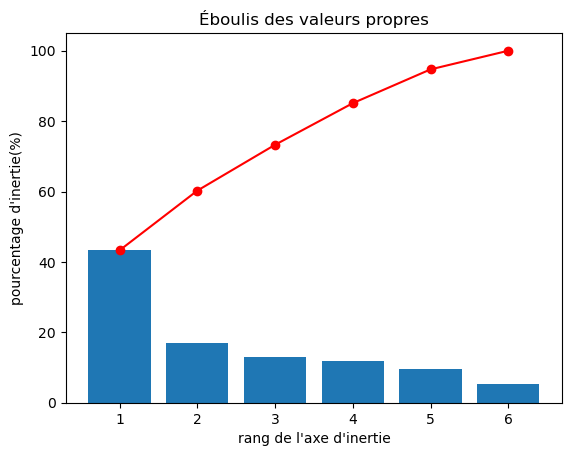

In [33]:
eboulis_valeurs_propre(pca)
plt.show()

In [34]:
## Cercle des correlations

In [35]:
# Définition de la fonction pour le graphique Cercle de corrélation
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

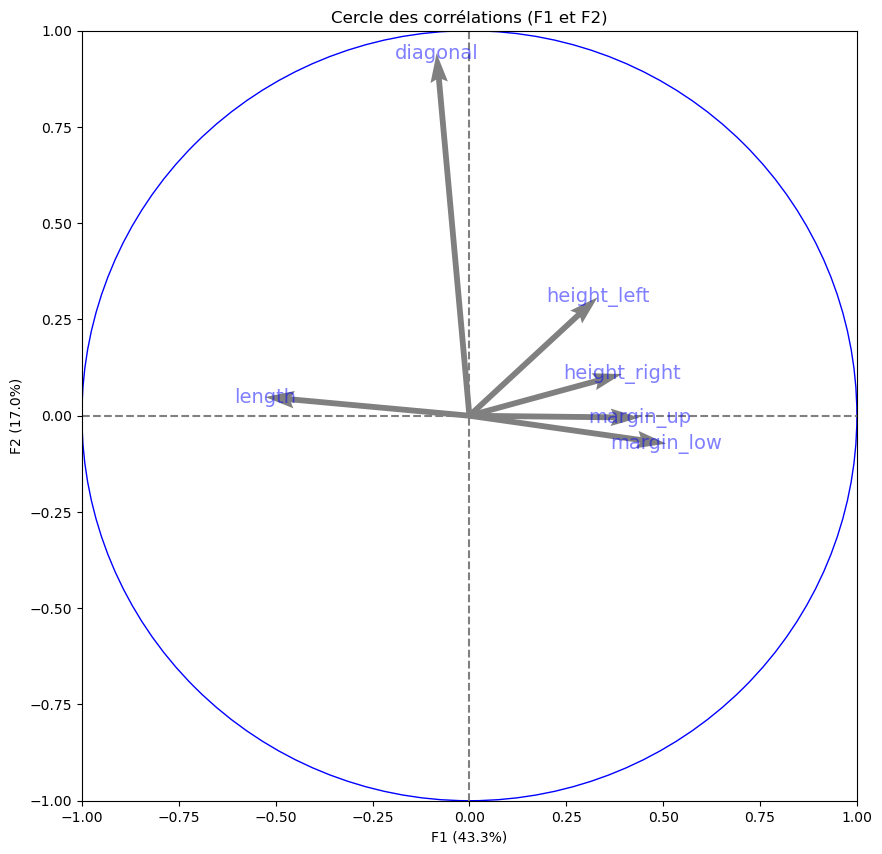

In [36]:
# Générer le Cercle des corrélations F1 et F2.
pcs = pca.components_ 
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(X.columns))

In [37]:
# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(
                        X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

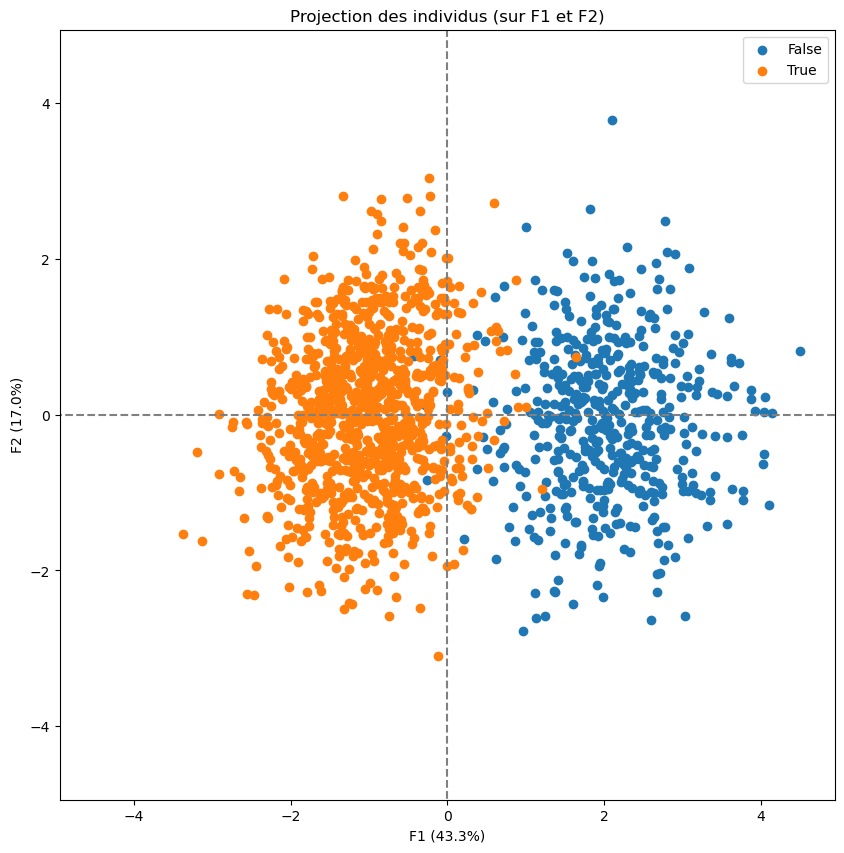

In [38]:
# Projection des individus sur F1 et F2 

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var = billets.is_genuine)

plt.show()

## K-means

In [39]:
# Nombre de clusters souhaités
n_clusters = 2

# Clustering par K-means
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

kmeans.fit(X_scaled)

billets_km = billets.copy()

# Récupération des clusters attribués à chaque individu
billets_km['Cluster'] = kmeans.labels_

C:\Users\ludov\anaconda3\envs\P10_envirronnement_v_3915\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


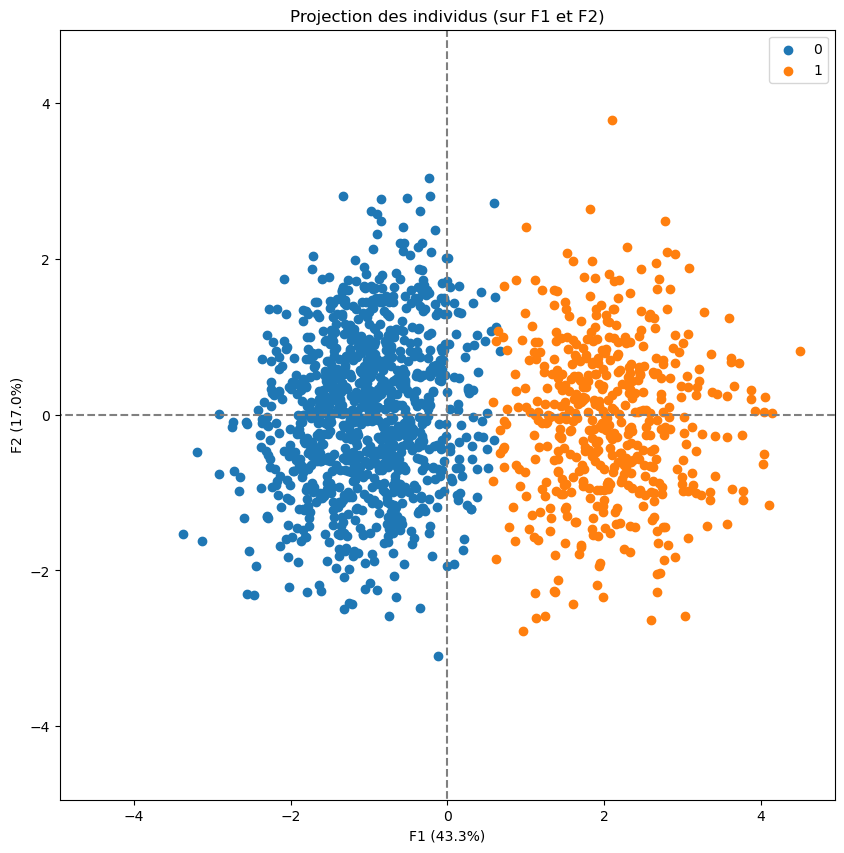

In [40]:
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var=billets_km.Cluster)

### Matrice de confusion

In [41]:
billets_km['is_genuine'].replace([True,False],[1,0], inplace=True)
billets_km.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster
0,1,171.81,104.86,104.95,4.52,2.89,112.83,1
1,1,171.46,103.36,103.66,3.77,2.99,113.09,0
2,1,172.69,104.48,103.50,4.40,2.94,113.16,0
3,1,171.36,103.91,103.94,3.62,3.01,113.51,0
4,1,171.73,104.28,103.46,4.04,3.48,112.54,0


In [42]:
y_vrai = billets_km.is_genuine
y_pred = kmeans.labels_

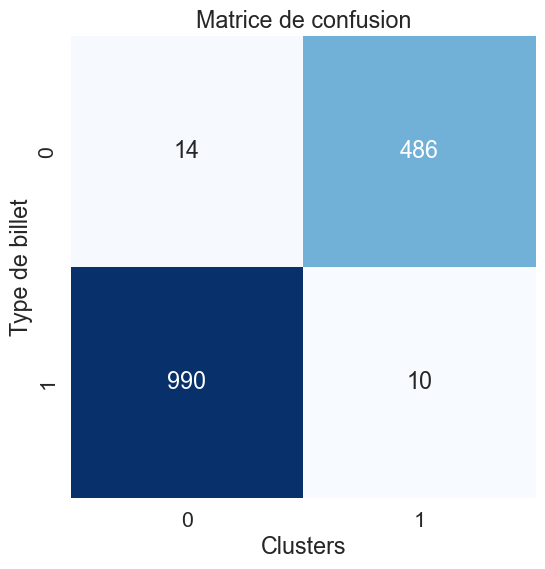

              precision    recall  f1-score   support

           0       0.01      0.03      0.02       500
           1       0.02      0.01      0.01      1000

    accuracy                           0.02      1500
   macro avg       0.02      0.02      0.02      1500
weighted avg       0.02      0.02      0.02      1500



In [43]:
conf_matrix = pd.crosstab(y_vrai, y_pred )

# Representation graphique de la matrice de confusion
sns.set(rc={'figure.figsize': (6, 6)}, font_scale=1.4)
sns.heatmap(conf_matrix, annot = True, fmt='', cmap='Blues', cbar=False)

plt.title('Matrice de confusion')
plt.xlabel('Clusters')
plt.ylabel('Type de billet')
plt.show()

print(classification_report(y_vrai,y_pred))

## Regression logistique

In [44]:
#Preparation des données
X = billets.drop(['is_genuine'], axis=1)
y = billets['is_genuine']



# Séparer training / testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=5)

#Creation du modéle de regression logistique

model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

# Coefficients
pd.DataFrame(np.concatenate([model_logit.intercept_.reshape(-1, 1), model_logit.coef_],
             axis=1), index=["coef"], columns=["constante"]+list(X.columns)).T

#Predictions
y_pred_test = model_logit.predict(X_test)


### Matrice de confusion

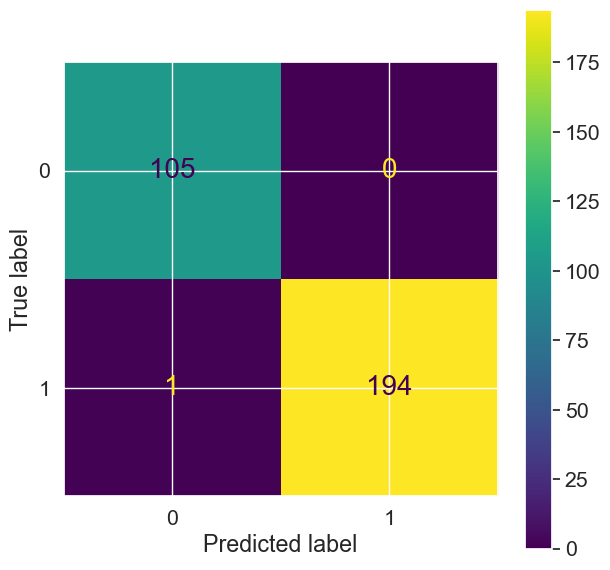

In [45]:
font = { 'size': 20}
plt.rc('font', **font)

cm = confusion_matrix(y_test, y_pred_test)
cmp = ConfusionMatrixDisplay(cm)
figure,ax = plt.subplots(figsize=(7,7))
cmp.plot(ax=ax)

### Évaluation du modèle avec les scores

#### Acuracy score

In [46]:

accuracy = accuracy_score(y_test, y_pred_test)
print("Le taux de prédiction correcte sur toutes les données de test = {}%".format( round(accuracy, 4)))

Le taux de prédiction correcte sur toutes les données de test = 0.9967%


#### Coefficient de Determination 

In [47]:

print('R2 de Train_score:', round(model_logit.score(X_train,y_train),3))
print('R2 de Test_score:', round(model_logit.score(X_test,y_test),3))

R2 de Train_score: 0.988
R2 de Test_score: 0.997


#### Cross-Validation

In [48]:


# Calcul la moyenne de 'accuracy scores'
scores = cross_val_score(
    estimator=model_logit,  
    X=X,  
    y=y,  
    scoring="accuracy",  
    cv=10, 
    n_jobs=-1  
)

print(scores)
print("average accuracy scores = %.4f" % np.mean(scores))
print("std of scores = %.4f" % np.std(scores))

[0.98666667 0.98666667 0.98666667 0.98666667 1.         0.99333333
 0.98       0.99333333 0.98666667 0.98666667]
average accuracy scores = 0.9887
std of scores = 0.0052


In [49]:

# Calcul de la moyenne de 'recall scores'
#Le recall permet de savoir le pourcentage de positifs bien prédit par notre modèle.

scores = cross_val_score(
    estimator=model_logit,  
    X=X,  
    y=y,  
    scoring="recall",  
    cv=10, 
    n_jobs=-1  
)

print(scores)
print("average recall scores = %.4f" % np.mean(scores))
print("std of scores = %.4f" % np.std(scores))

[0.99 1.   1.   1.   1.   0.99 0.98 0.99 1.   0.98]
average recall scores = 0.9930
std of scores = 0.0078


## K-NN

In [50]:
X = billets.drop(['is_genuine'], axis=1)
y = billets['is_genuine']

In [51]:

# Séparer training / testing set
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X,y,test_size=0.2, random_state=5)

### Choix du nombre optimal de K

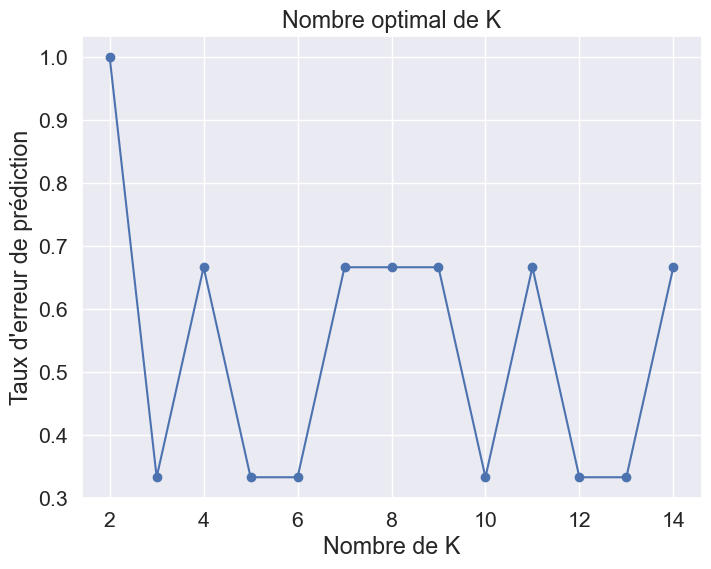

In [52]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train_k, y_train_k).score(X_test_k, y_test_k)))
plt.figure(figsize=(8, 6))
plt.plot(range(2,15), errors, 'o-')
plt.title('Nombre optimal de K')
plt.ylabel("Taux d'erreur de prédiction")
plt.xlabel('Nombre de K')
plt.show()
plt.show()

### Creation de modéle K-NN

In [53]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train_k, y_train_k)

KNeighborsClassifier(n_neighbors=3)

### Predictions

In [54]:
y_pred_test_k= knn.predict(X_test_k)

### Matrice de confusion

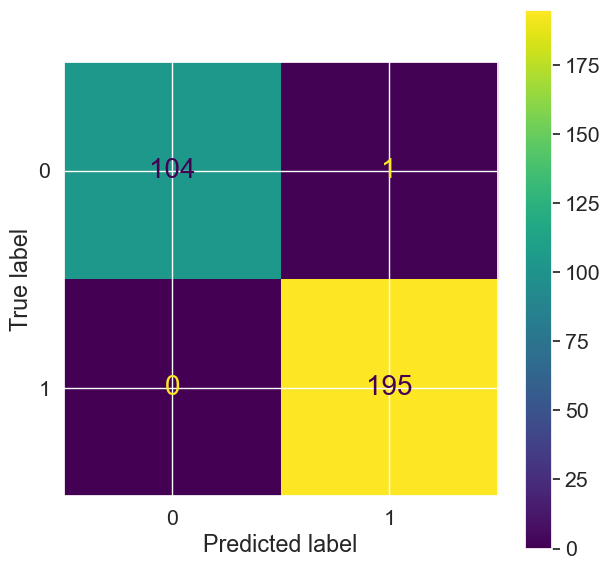

In [55]:
font = {'size': 20}
plt.rc('font', **font)

cm_k = confusion_matrix(y_test_k, y_pred_test_k)
cmp = ConfusionMatrixDisplay(cm_k)
figure,ax = plt.subplots(figsize=(7,7))
cmp.plot(ax=ax)

### Evaluation du modéle avec les scores

#### Accuracy score

In [56]:
accuracy = accuracy_score(y_test_k, y_pred_test_k)
print("Le taux de prédiction correcte sur toutes les données de test = {}%".format( round(accuracy, 4)))

Le taux de prédiction correcte sur toutes les données de test = 0.9967%


#### Le coefficient de détermination R2

In [57]:
print('R2 de Train_score:', round(model_logit.score(X_train_k,y_train_k),3))
print('R2 de Test_score:', round(model_logit.score(X_test_k,y_test_k),3))

R2 de Train_score: 0.988
R2 de Test_score: 0.997


#### Cross-validation

In [58]:
# Calcul de la moyenne des 'accuracy scores'
scores = cross_val_score(
    estimator= knn,  
    X=X,  
    y=y,  
    scoring="accuracy",  
    cv=10, 
    n_jobs=-1  
)

print(scores)
print("average accurancy score  = %.4f" % np.mean(scores))
print("std of scores = %.4f" % np.std(scores))

[0.98       0.98666667 0.98666667 0.98666667 1.         0.99333333
 1.         0.99333333 0.98       0.98666667]
average accurancy score  = 0.9893
std of scores = 0.0068


# Conclusion

In [59]:
#Creation d'un df reprenant les scores des differents modeles

df = {'Accuracy': {'K-means':0.98, 'Régression logistique': 0.99, 'K-NN':0.99},
        'Recall':{'K-means':0.98, 'Régression logistique': 0.995, 'K-NN':0.996}}
score = pd.DataFrame(df)
score

,Accuracy,Recall
K-means,0.98,0.980
Régression logistique,0.99,0.995
K-NN,0.99,0.996


# Test avec nouvelles données

In [60]:
billets_production=pd.read_csv(r"C:\Users\ludov\Desktop\OC\FORMATION\Projet10\billets_production.csv")
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [61]:



#On enleve la colonne ID
billets_values=billets_production.drop('id', axis=1)



In [62]:
billets_values

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [63]:

y_pred_production = model_logit.predict(billets_values)

In [64]:
proba_true = model_logit.predict_proba(billets_values)[:, 1]
proba_true

array([5.14852113e-03, 9.69433229e-04, 1.42385631e-03, 9.17352847e-01,
       9.99601826e-01])

In [65]:
billets_production['Prediction'] = y_pred_production
billets_production['Probability_is_true'] = proba_true.round(3)

In [66]:
billets_production

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Prediction,Probability_is_true
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,0.005
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,0.001
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,0.001
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,0.917
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,1.000


In [67]:

billets_predict = billets_production[['id','Prediction','Probability_is_true']].set_index("id")

billets_predict 

,Prediction,Probability_is_true
id,,
A_1,False,0.005
A_2,False,0.001
A_3,False,0.001
A_4,True,0.917
A_5,True,1.000


# Creation fonction de modele de détection avec régression logistique

In [68]:
def verif_billet_rl(csv):
    billet_test= pd.read_csv(csv)
    billet_value=billet_test.drop('id', axis=1)
    y_pred = model_logit.predict(billet_value)
    proba_true = model_logit.predict_proba(billet_value)[:, 1]
    billet_test['Prediction'] = y_pred
    billet_test['Probability_is_true'] = proba_true.round(3)
    billets_predict_rl = billet_test[['id','Prediction','Probability_is_true']].set_index("id")
    return billets_predict_rl

In [69]:

# Tester le fonction
verif_billet_rl(r"C:\Users\ludov\Desktop\OC\FORMATION\Projet10\billets_production.csv")

,Prediction,Probability_is_true
id,,
A_1,False,0.005
A_2,False,0.001
A_3,False,0.001
A_4,True,0.917
A_5,True,1.000
